In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np

In [4]:
path = r".\log\centralized.csv"


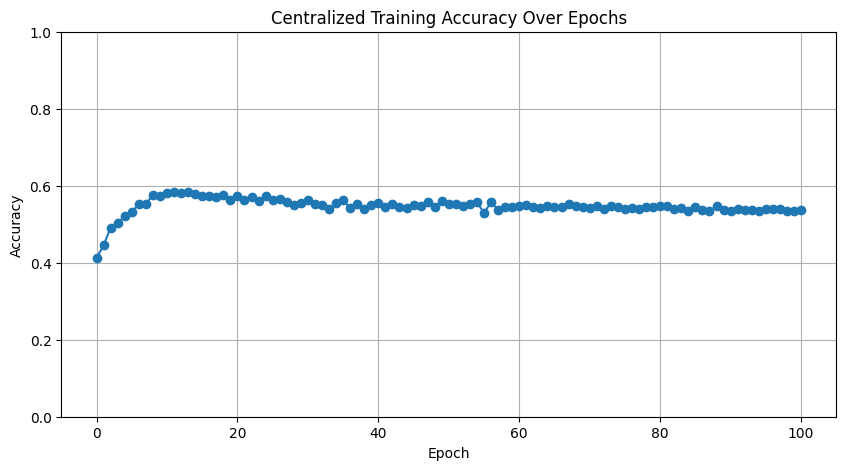

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasının yolunu belirle
path = "../log/centralized.csv"  # Üst klasörden erişim

# CSV dosyasını oku
df = pd.read_csv(path, header=None, names=["Accuracy"])

# Grafik çizme
plt.figure(figsize=(10, 5))
plt.plot(df["Accuracy"], marker="o", linestyle="-")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Centralized Training Accuracy Over Epochs")
plt.ylim(0, 1)  # Y ekseni limitlerini 0 ile 1 arasına ayarla
plt.grid(True)
plt.savefig("../centralized_accuracy_plot2.jpg")

# Grafiği göster
plt.show()


In [25]:
path_federated_acc= r"../code/federated_acc_linux.csv"
df_federated_acc = pd.read_csv(path_federated_acc)

In [26]:
df_federated_acc.head()

,NUM_CLIENTS,NUM_ROUNDS,BATCH_SIZE,NOISE_MULTIPLIER,EVAL_RATIO,ACCURACY
0,3,10,64,0.1,0.8,0.093731
1,3,10,64,0.1,0.8,0.098380
2,3,10,64,0.1,0.8,0.103779
3,3,10,64,0.1,0.8,0.099580
4,3,10,64,0.1,0.8,0.105279


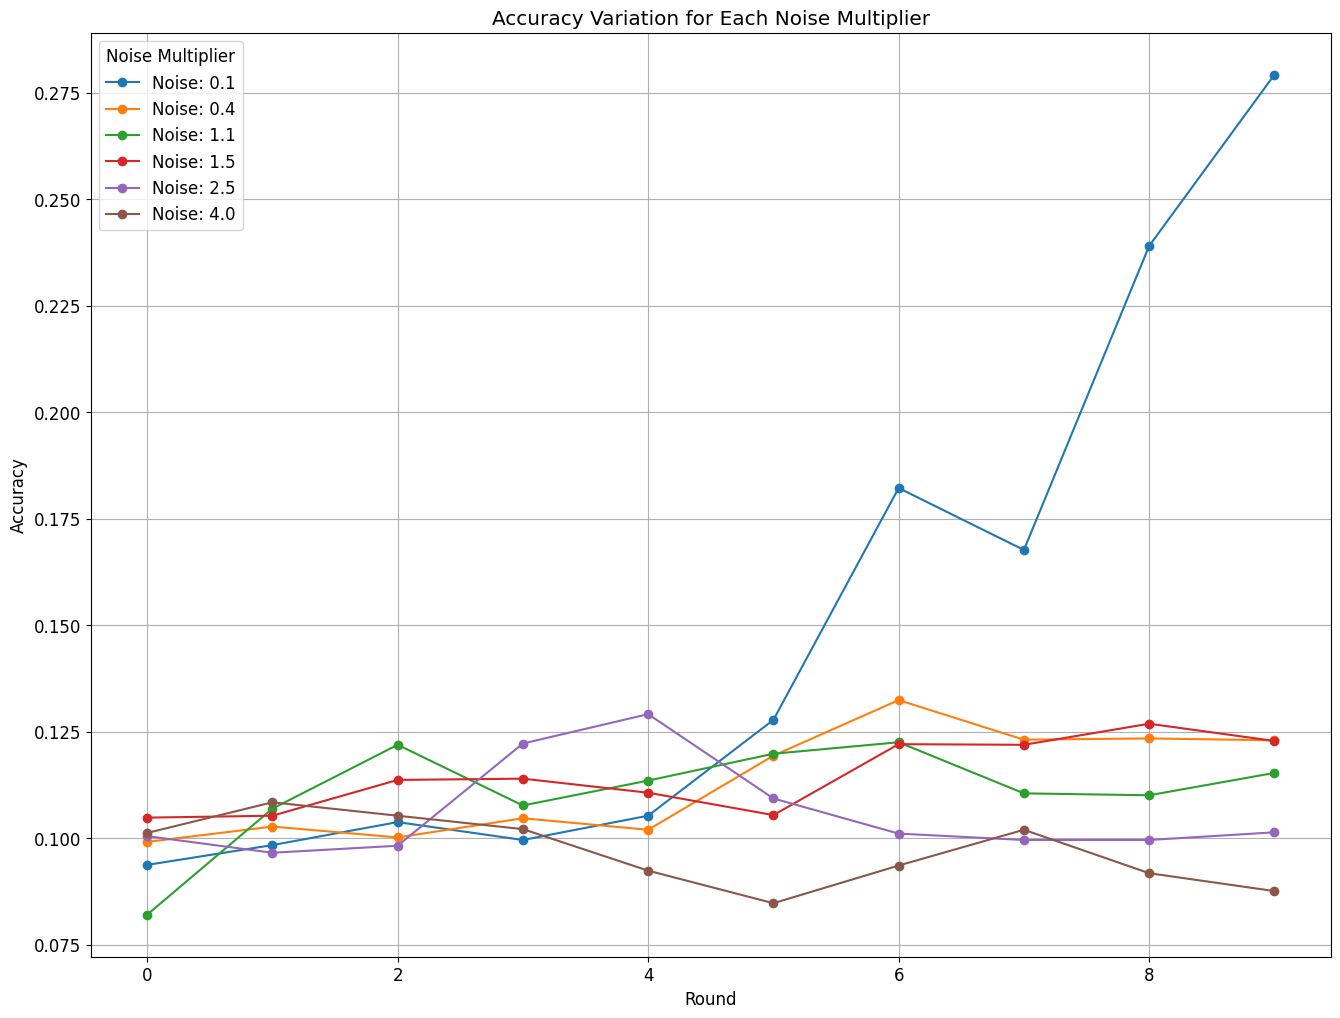

In [34]:
plt.figure(figsize=(16, 12))

# Her noise multiplier için ayrı çizgi oluşturmak üzere unique değerleri alıyoruz
noise_levels = sorted(df_federated_acc['NOISE_MULTIPLIER'].unique())

for noise in noise_levels:
    # Belirli bir noise multiplier için alt küme oluştur
    subset = df_federated_acc[df_federated_acc['NOISE_MULTIPLIER'] == noise].reset_index()
    # x ekseni olarak ölçüm sırasını (0'dan başlayan index) kullanıyoruz
    plt.plot(subset.index, subset['ACCURACY'], marker='o', linestyle='-', label=f"Noise: {noise}")

plt.grid(True)  

plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.title("Accuracy Variation for Each Noise Multiplier")
plt.legend(title="Noise Multiplier")
plt.savefig("../federated_accuacy.jpg")
plt.show()

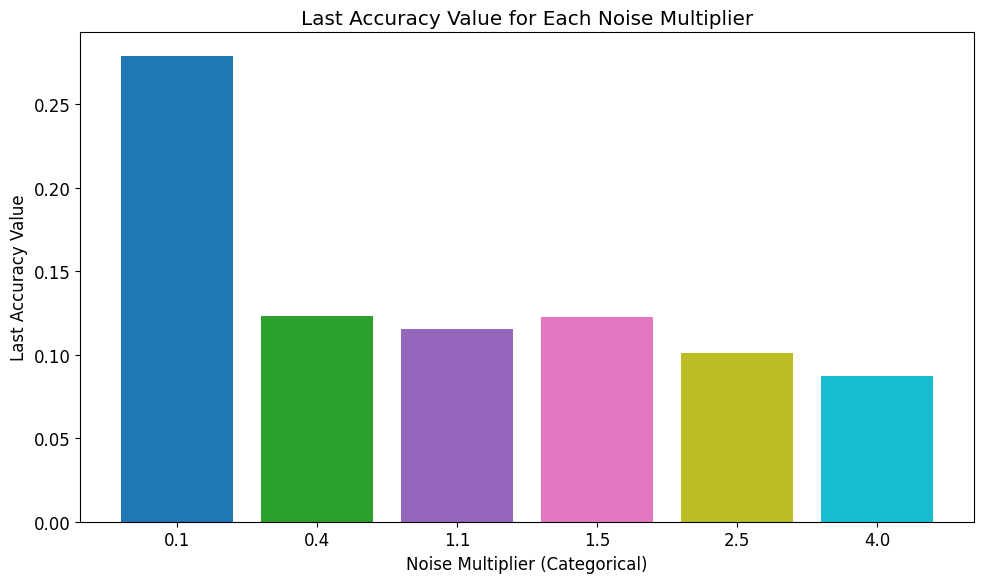

In [42]:
# Group by 'NOISE_MULTIPLIER' and get the last row for each group
df_last = df_federated_acc.groupby('NOISE_MULTIPLIER', as_index=False).last()
df_last.sort_values(by='NOISE_MULTIPLIER', inplace=True)

# Convert noise multiplier to string so each value is treated as a categorical label
df_last['NOISE_MULTIPLIER_STR'] = df_last['NOISE_MULTIPLIER'].astype(str)

# Number of bars (unique noise multipliers)
num_bars = len(df_last)

# Use 'resampled()' to get a colormap with a specified number of discrete colors
cmap = colormaps.get_cmap('tab10').resampled(num_bars)
bar_colors = [cmap(i) for i in range(num_bars)]

plt.figure(figsize=(10, 6))
plt.bar(df_last['NOISE_MULTIPLIER_STR'], df_last['ACCURACY'], color=bar_colors)
plt.xlabel("Noise Multiplier (Categorical)")
plt.ylabel("Last Accuracy Value")
plt.title("Last Accuracy Value for Each Noise Multiplier")
plt.savefig("../federated_accuacy2.jpg")
plt.tight_layout()
plt.show()

In [54]:
path_federated_execution= r"../code/execution_time_linux.csv"
df_federated_execution = pd.read_csv(path_federated_execution)

In [58]:
df_federated_execution

,NUM_CLIENTS,NUM_ROUNDS,BATCH_SIZE,NOISE_MULTIPLIER,EVAL_RATIO,RUNNING_TIME
0,3,10,64,0.1,0.8,203.268337
1,3,10,64,0.4,0.8,214.073687
2,3,10,64,1.1,0.8,235.622836
3,3,10,64,1.5,0.8,227.414889
4,3,10,64,2.5,0.8,238.412880
5,3,10,64,4.0,0.8,215.252021


Columns in DataFrame: Index(['NUM_CLIENTS', 'NUM_ROUNDS', 'BATCH_SIZE', 'NOISE_MULTIPLIER',
       'EVAL_RATIO', 'RUNNING_TIME', 'NOISE_MULTIPLIER_STR'],
      dtype='object')


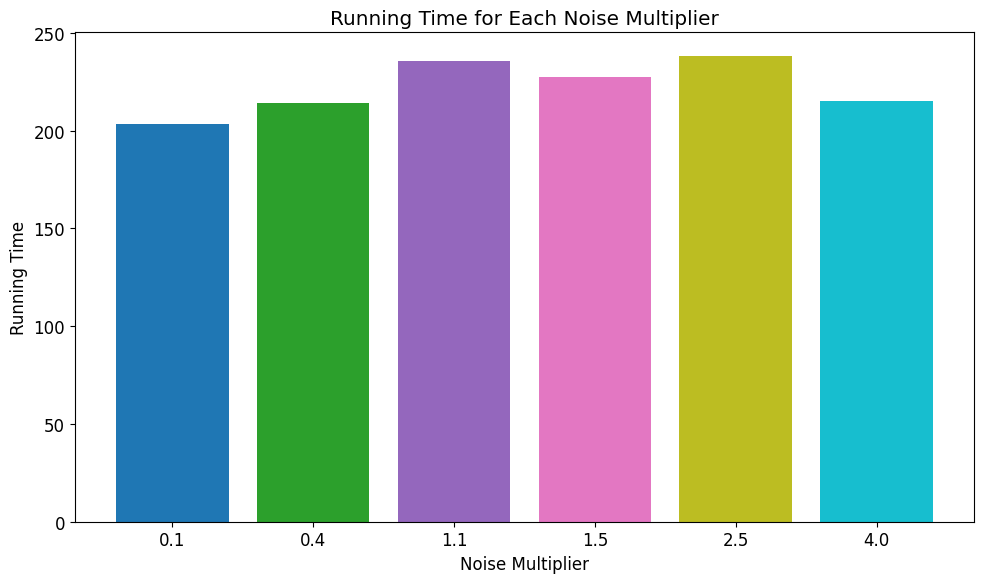

In [62]:
# Print the DataFrame columns to confirm
print("Columns in DataFrame:", df_federated_execution.columns)

# Convert the 'NOISE_MULTIPLIER' column to string to treat it as a categorical variable
df_federated_execution['NOISE_MULTIPLIER_STR'] = df_federated_execution['NOISE_MULTIPLIER'].astype(str)

# Determine the number of unique bars (each row is a unique noise level here)
num_bars = len(df_federated_execution)

# Create a discrete colormap with a distinct color for each noise multiplier
cmap = colormaps.get_cmap('tab10').resampled(num_bars)
bar_colors = [cmap(i) for i in range(num_bars)]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_federated_execution['NOISE_MULTIPLIER_STR'], df_federated_execution['RUNNING_TIME'], color=bar_colors)
plt.xlabel("Noise Multiplier")
plt.ylabel("Running Time")
plt.title("Running Time for Each Noise Multiplier")
plt.tight_layout()
plt.savefig("../federated_runningTime.jpg")

plt.show()